<a href="https://colab.research.google.com/github/RAks55/Retinal-Multiclassification/blob/main/Copy_of_MulticlassIncep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_width=299; img_height=299
batch_size=32

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/OCT2017/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0)
                                

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

Found 12008 images belonging to 4 classes.


In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/OCT2017/val'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 1200 images belonging to 4 classes.


In [ ]:
TEST_DIR = '/content/drive/MyDrive/OCT2017/test'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = validation_datagen.flow_from_directory(TEST_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

Found 977 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [ ]:
inception_model = Sequential()

pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
    weights="imagenet",
    input_shape=(299,299,3),
    pooling='avg', classes=4)
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)
inception_model.add(Flatten())

inception_model.add(Dense(512, activation='relu'))

inception_model.add(Dense(4, activation='softmax'))
inception_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 4)                2052      
 pper)                                                           
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-

In [ ]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
inception_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = inception_model.fit(train_generator,
                              epochs=25,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/25
376/376 [==============================] - 4279s 11s/step - loss: 0.5699 - accuracy: 0.7871 - val_loss: 0.6461 - val_accuracy: 0.7483
Epoch 2/25
376/376 [==============================] - 117s 311ms/step - loss: 0.3769 - accuracy: 0.8601 - val_loss: 0.5519 - val_accuracy: 0.7867
Epoch 3/25
376/376 [==============================] - 118s 312ms/step - loss: 0.3456 - accuracy: 0.8710 - val_loss: 0.5803 - val_accuracy: 0.7700
Epoch 4/25
376/376 [==============================] - 117s 312ms/step - loss: 0.2937 - accuracy: 0.8917 - val_loss: 0.9042 - val_accuracy: 0.7350
Epoch 5/25
376/376 [==============================] - 118s 312ms/step - loss: 0.2743 - accuracy: 0.8968 - val_loss: 0.9064 - val_accuracy: 0.7350
Epoch 6/25
376/376 [==============================] - 118s 312ms/step - loss: 0.2509 - accuracy: 0.9095 - val_loss: 0.7928 - val_accuracy: 0.7758
Epoch 7/25
376/376 [==============================] - 117s 312ms/step - loss: 0.2274 - accuracy: 0.9186 - val_loss: 0.6599 - 

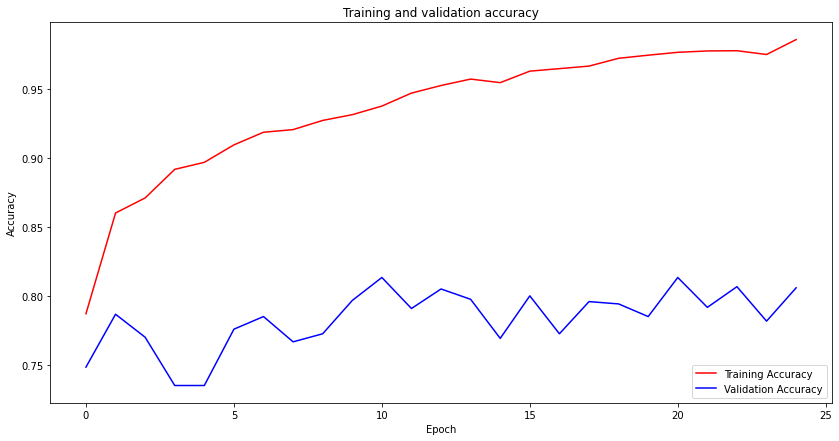

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

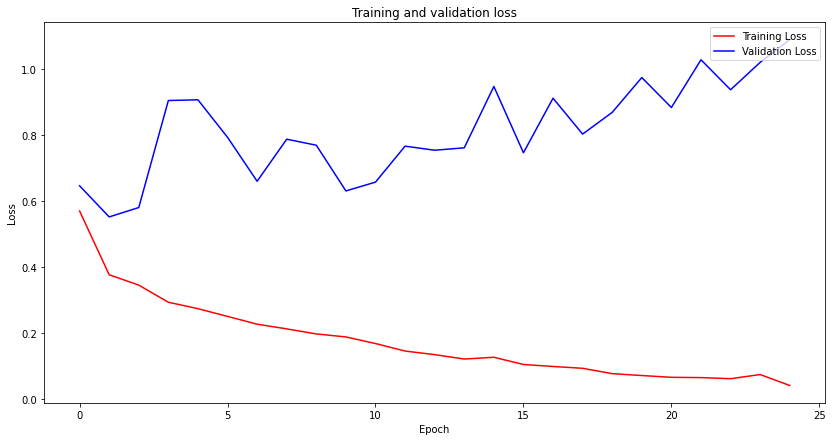

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
inception_model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.022003991529345512, 0.9950866103172302]

In [ ]:
inception_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.2921850383281708, 0.935516893863678]

In [ ]:
predictions=inception_model.predict(test_generator)
predictions

array([[8.7818094e-13, 5.2312372e-04, 1.4464461e-04, 9.9933225e-01],
       [1.0037405e-08, 5.3283129e-06, 9.7960299e-01, 2.0391624e-02],
       [5.9607638e-19, 5.3041763e-06, 2.0520082e-08, 9.9999475e-01],
       ...,
       [3.7235714e-04, 9.9962759e-01, 4.9989130e-14, 1.3340437e-12],
       [5.8582705e-02, 4.4660292e-06, 9.4141287e-01, 8.2484108e-09],
       [2.6204489e-05, 9.9996161e-01, 2.7189524e-06, 9.4411680e-06]],
      dtype=float32)